# Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [113]:
X = pd.read_csv('../data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(10000)
X.head()

,lat,lon,alt
114939,10.400343,57.582848,1.507983
264146,10.515504,57.445018,20.212532
132821,10.167036,56.783060,16.480972
231108,9.928222,57.043775,2.791583
393317,10.103037,57.239930,25.387568


In [114]:
XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()
XX.head()

,lat,lon,alt
114939,1.061388,1.742729,-1.110135
264146,1.244744,1.263748,-0.124896
132821,0.689920,-1.036656,-0.321451
231108,0.309687,-0.130632,-1.042523
393317,0.588024,0.551036,0.147693


In [115]:
min_samples = np.arange(1, 11, 1)
epsilons = np.arange(.05, .51, .01)

In [116]:
min_samples

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [117]:
epsilons

array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37,
       0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48,
       0.49, 0.5 ])

In [123]:
all_scores = []
for min_sample in min_samples:
    scores = []
    for epsilon in epsilons:       
        dbscan=DBSCAN(eps=epsilon, min_samples=min_sample)
        labels = dbscan.fit_predict(XX[['lat','lon', 'alt']])
        # calculate silouette score here
        score = metrics.silhouette_score(XX[['lat', 'lon', 'alt']], labels)
        
        scores.append(score)

    all_scores.append(scores)

In [124]:
len(all_scores)

10

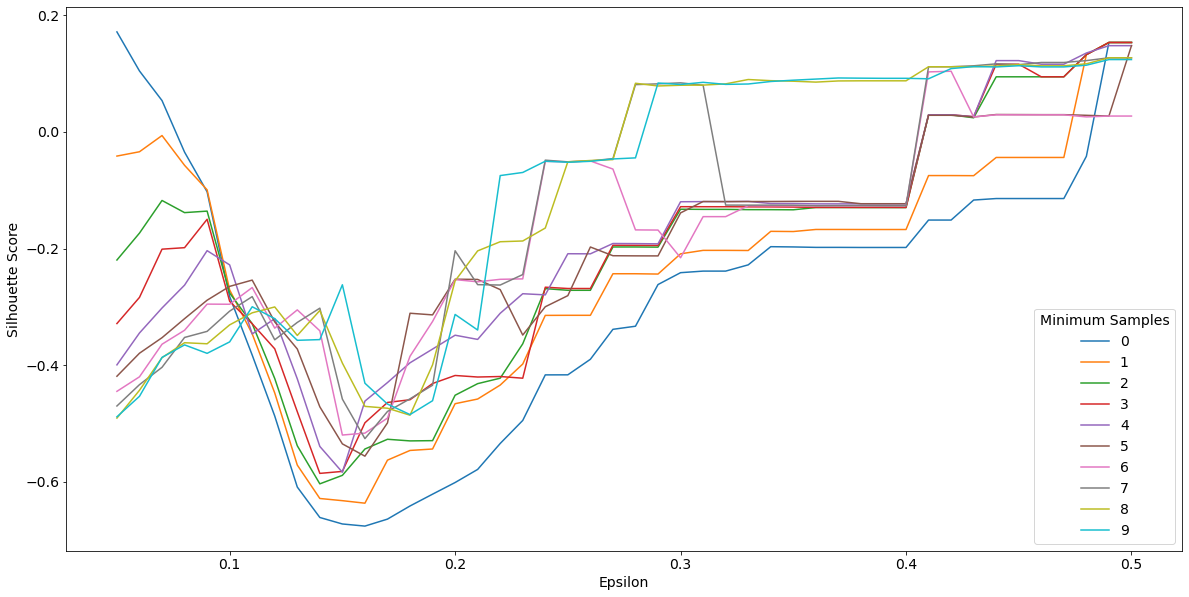

In [127]:
plt.figure()
for m in range(len(min_samples)):
    plt.plot(epsilons,all_scores[m],label=m)
plt.legend(title='Minimum Samples',loc='lower right')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

In [128]:
wine = pd.read_csv('../add_data/wine/wine.data',
               names = ['class','alcohol','malic acid','ash','alc of ash',
                       'mag','phenols','flavan','nonflav phenols','proanth',
                       'color inten','hue','0D280','proline'])
wine['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

In [129]:
labels_test = wine['class']
xx = wine.copy().drop('class',axis=1)
len(xx)

178

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
xx_s = StandardScaler().fit_transform(xx)
xx_s

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [131]:
pca = PCA(n_components=2)
xx_r = pca.fit_transform(xx_s)
xx_r

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [132]:
xx_df = pd.DataFrame(xx_r,columns=['pca1','pca2'])
xx_df

,pca1,pca2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


In [133]:
all_scores = []

for min_sample in min_samples:
    scores = []

    for epsilon in epsilons:
        
        try:
            predict=DBSCAN(eps=epsilon, min_samples=min_sample).fit_predict(xx_df)
            # calculate silouette score here
            score = metrics.silhouette_score(xx_df, predict)
        
            scores.append(score)
        
        except:
            scores.append(np.nan)

    all_scores.append(scores)

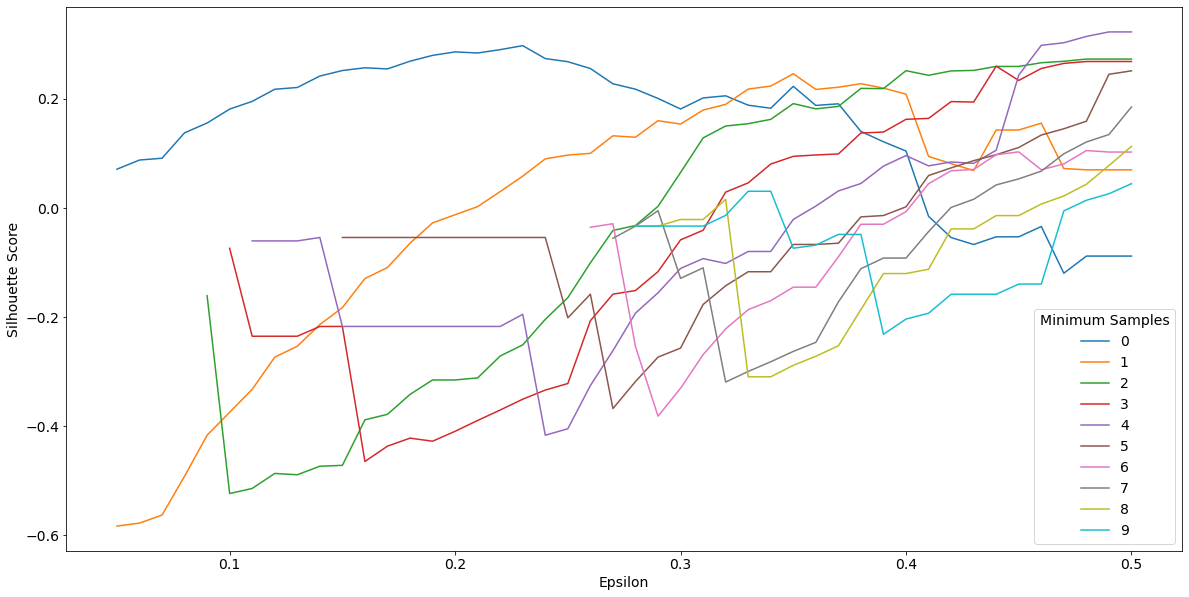

In [135]:
plt.figure()
for m in range(len(min_samples)):
    plt.plot(epsilons,all_scores[m],label=m)
plt.legend(title='Minimum Samples',loc='lower right')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.show()

In [136]:
labels_pred = DBSCAN(eps=0.5,min_samples=4).fit_predict(xx_df)

In [137]:
metrics.rand_score(labels_test, labels_pred)

0.7700120611946931

In [138]:
metrics.adjusted_rand_score(labels_test, labels_pred)

0.4492086520143072

In [140]:
xx_df['labels_pred'] = labels_pred
xx_df

,pca1,pca2,labels_pred
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,-1
4,1.008908,-0.869831,0
...,...,...,...
173,-3.370524,-2.216289,-1
174,-2.601956,-1.757229,4
175,-2.677839,-2.760899,4
176,-2.387017,-2.297347,4


In [150]:
np.unique(labels_pred)

array([-1,  0,  1,  2,  3,  4])

In [154]:
colors = np.array(['red','orange','gold','green','blue','purple'])

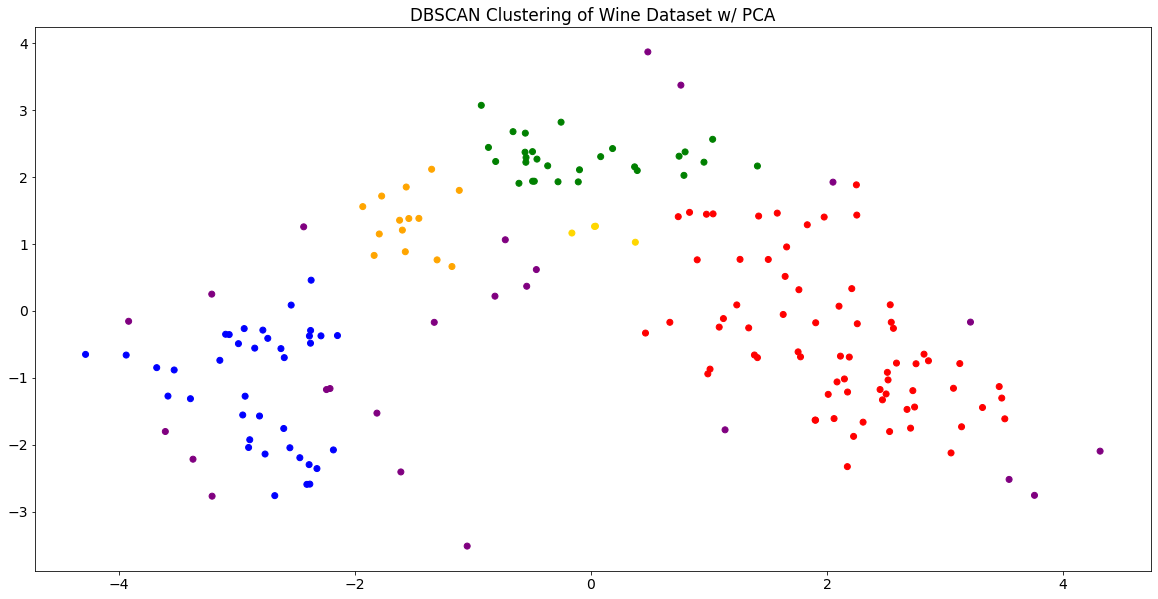

In [156]:
plt.figure()
plt.scatter(xx_df['pca1'],xx_df['pca2'],c=colors[labels_pred])
plt.title('DBSCAN Clustering of Wine Dataset w/ PCA')
plt.show()